# 1. Import & Preview the Data


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


# 2. Data Cleaning

In [ ]:
# Remove ₹ and commas
df['discounted_price'] = df['discounted_price'].replace('₹','', regex=True).replace(',','', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('₹','', regex=True).replace(',','', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace(',','', regex=True).astype(float)
# Cleaned pricing and rating fields for analysis.

# 3. Univariate Analysis

## Rating Distribution

Text(0.5, 1.0, 'Product Rating Distribution')

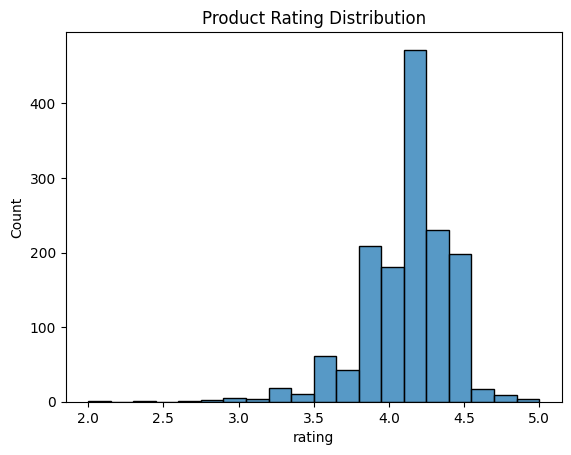

In [11]:
sns.histplot(df['rating'], bins=20)
plt.title("Product Rating Distribution")

 Observation:

Most product ratings fall between 3.5 and 4.5, indicating a generally positive customer experience. Very few products are rated below 3, which may suggest that low-rated products are removed or not reviewed often.

## Discount % Distribution

Text(0.5, 1.0, 'Discount % Spread')

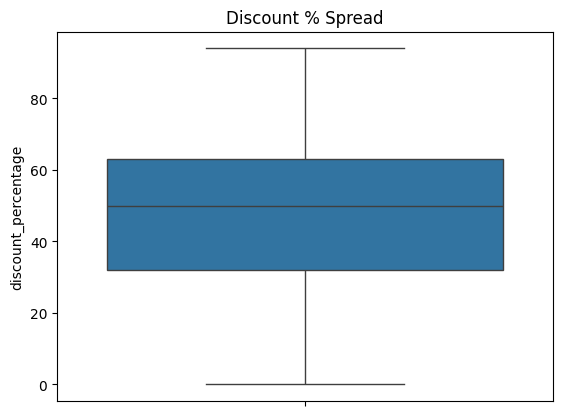

In [12]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)
sns.boxplot(df['discount_percentage'])
plt.title("Discount % Spread")

Observation:

While the median discount is around 50%, there are several outliers where discounts reach 80–90%, suggesting aggressive pricing or clearance sales. Products with minimal discounts are rare.

# 4. Bivariate Analysis

## Discount vs Rating

Text(0.5, 1.0, 'Discount % vs Product Rating')

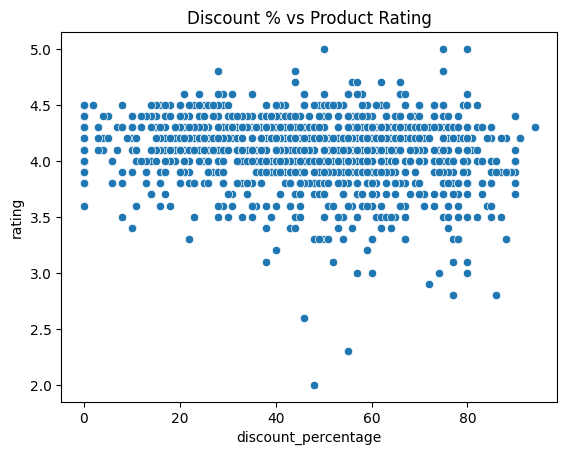

In [13]:
sns.scatterplot(x='discount_percentage', y='rating', data=df)
plt.title("Discount % vs Product Rating")

Observation:

No strong correlation between higher discounts and higher ratings. This suggests that price cuts do not necessarily improve product satisfaction, and product quality or brand reputation likely plays a larger role.

## Actual Price vs Discounted Price

Text(0.5, 1.0, 'Actual vs Discounted Price')

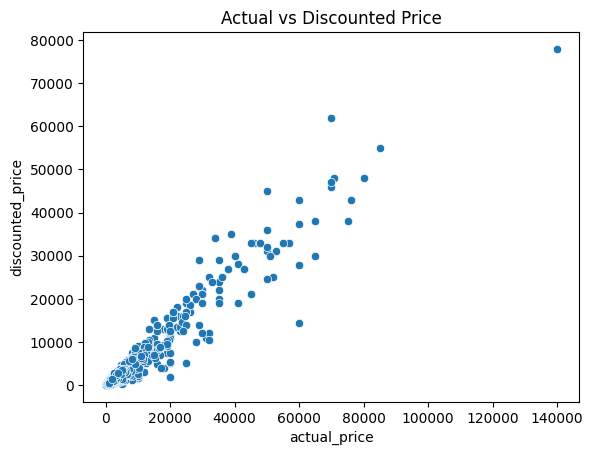

In [14]:
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title("Actual vs Discounted Price")

Observation:

As expected, higher actual prices generally lead to higher discounted prices, but a few high-ticket items are deeply discounted. This helps identify overpriced products or luxury items on sale.

## 5. Top Categories by Product Count

Text(0.5, 1.0, 'Top 10 Product Categories')

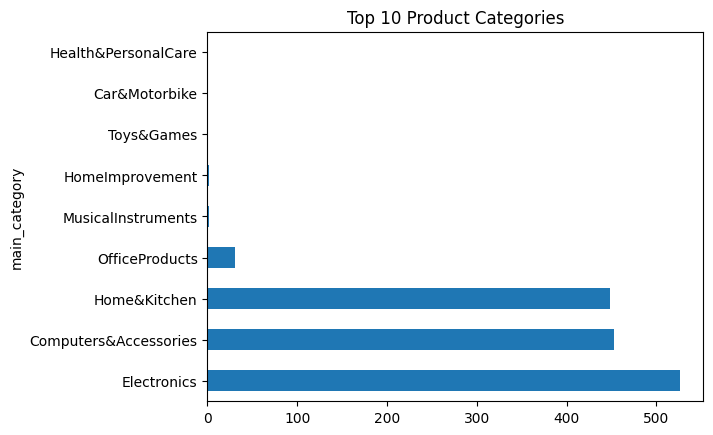

In [15]:
df['main_category'] = df['category'].apply(lambda x: str(x).split('|')[0])
df['main_category'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Product Categories")

Observation:

The Computers & Accessories category dominates the dataset. This indicates the dataset likely focuses on tech products, especially mobile and USB-related accessories.

# 6. Correlation Heatmap

<Axes: >

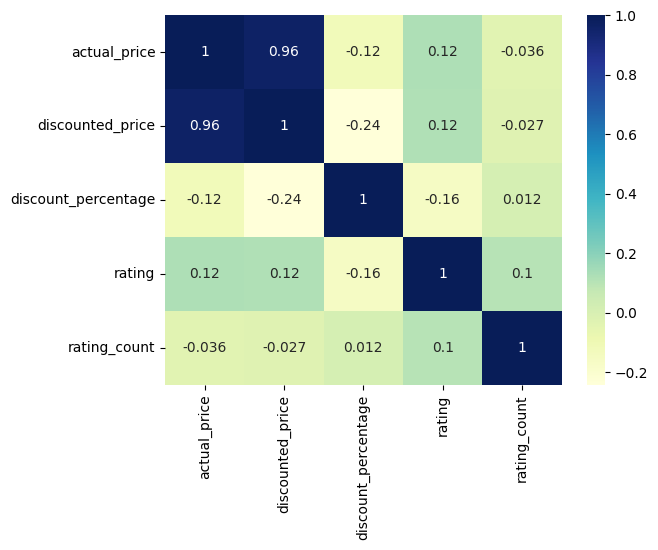

In [16]:
corr = df[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count']].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

 Observation:

actual_price and discounted_price show a strong positive correlation (as expected).

discount_percentage has a moderate negative correlation with discounted_price and actual_price.

rating and rating_count have very low correlation with price or discount, showing customer satisfaction is not strongly price-driven.

# 7. Summary of EDA Findings

- Most products are rated between 3.5 and 4.5.
- Higher discounts do not always mean better ratings.
- Some products are heavily discounted (over 70%) and still low-rated.
- Mobile accessories dominate the category list.
- Significant outliers exist in `actual_price` (very expensive items).